In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from sklearn.model_selection import train_test_split

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**The dataset**

In [44]:
data=pd.read_csv('/content/drive/MyDrive/ECommerce_data.csv', dtype={'CustomerID':str}, parse_dates= ['InvoiceDate'], encoding='unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


**Data Describe**

In [45]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


**Missing Value**

In [46]:
missval = data.isnull().sum()
missval

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [47]:
#Percentage of null value (Description)
data.Description.isnull().sum()/data.shape[0] * 100

0.2683107311375157

In [48]:
#Percentage of null value (CustomerID)
data.CustomerID.isnull().sum()/data.shape[0] * 100

24.926694334288598

About 25% of the customerID are unknown.....which is really strange and 0.27% missing description.
But still we not sure there are any null value left cause it could be hidden (like nan-value instead of NaN-value or empty string ""). Let check one more time.


In [49]:
data.loc[data.Description.isnull()==False, "nan_value"] = data.loc[
    data.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

data.nan_value.dropna().apply(
    lambda l: np.where("nan" in l, True, False)
).value_counts()

False    539724
True        731
Name: nan_value, dtype: int64

In [50]:
data.loc[data.Description.isnull()==False, "empty_value"] = data.loc[
    data.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

data.empty_value.dropna().apply(
    lambda l: np.where("" == l, True, False)
).value_counts()

False    540455
Name: empty_value, dtype: int64

To be safe and more easy for us to deal, i'm gonna delete all of these thing

In [51]:
data = data.loc[(data.CustomerID.isnull()==False) & (data.nan_value.isnull()==False) & (data.empty_value.isnull()==False)].copy()
data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,nan_value,empty_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart t-light holder,white hanging heart t-light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart.,red woolly hottie white heart.
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,pack of 20 spaceboy napkins,pack of 20 spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,children's apron dolly girl,children's apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery dolly girl,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery circus parade,childrens cutlery circus parade


**The invoice number**

In [52]:
data.InvoiceNo.nunique()

22190

So we already know that any transaction start with "C" in front of the value in InvoiceNo column. I will filter it out

In [53]:
data["CancelTrans"]=np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
data.CancelTrans.value_counts() / data.shape[0] * 100

False    97.81112
True      2.18888
Name: CancelTrans, dtype: float64

In [54]:
data.loc[data.CancelTrans== True].describe()

,Quantity,UnitPrice
count,8905.000000,8905.000000
mean,-30.859966,18.845519
std,1170.154939,444.366043
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


So we can see that all the cancellations have negative quantities, meaning that we have a hugh amount of order that have been cancel by customer without knowing the reason. For the good reason to easier to do with the caculation later on, let drop them.

In [55]:
data = data.loc[data.CancelTrans==False].copy()
data = data.drop("CancelTrans", axis=1)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,nan_value,empty_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart t-light holder,white hanging heart t-light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart.,red woolly hottie white heart.
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,pack of 20 spaceboy napkins,pack of 20 spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,children's apron dolly girl,children's apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery dolly girl,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery circus parade,childrens cutlery circus parade


**The unit price**


In [56]:
data.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Still there are something strange when we have a zero unit price.

In [57]:
data.loc[data.UnitPrice == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,nan_value,empty_value
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,round cake tin vintage green,round cake tin vintage green
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,advent calendar gingham sack,advent calendar gingham sack
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,regency cakestand 3 tier,regency cakestand 3 tier
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,paper bunting retrospot,paper bunting retrospot
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,plasters in tin skulls,plasters in tin skulls


5 invoice are having unit price equal 0, either its a gift to customer or a mistype of the staff it will make us difficult in futher caculation, we better drop them.

In [58]:
data = data.loc[data.UnitPrice > 0].copy()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,nan_value,empty_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart t-light holder,white hanging heart t-light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart.,red woolly hottie white heart.
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,pack of 20 spaceboy napkins,pack of 20 spaceboy napkins
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,children's apron dolly girl,children's apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery dolly girl,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery circus parade,childrens cutlery circus parade


**The Stockcode**

In [59]:
data.StockCode.nunique()

3665

So there are total 3665 different stock code in the dataset. Let check how many character are there in ech stock code.

In [60]:
def count_numeric_chars(l):
    return sum(1 for c in l if c.isdigit())

data["StockCodeLength"] = data.StockCode.apply(lambda l: len(l))
data["nNumericStockCode"] = data.StockCode.apply(lambda l: count_numeric_chars(l))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


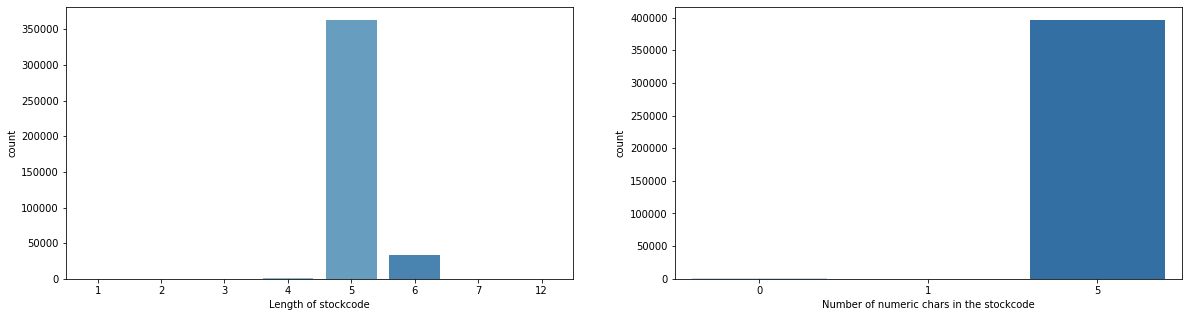

In [61]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(data["StockCodeLength"], palette="Blues", ax=ax[0])
sns.countplot(data["nNumericStockCode"], palette="Blues", ax=ax[1])
ax[0].set_xlabel("Length of stockcode")
ax[1].set_xlabel("Number of numeric chars in the stockcode");

So we can see most of the stockcode have 5 character (and most of them are numeric), however there are another stockcode length (from 1-12 character) with mixed numberic and nonminal character. So we better drop all of them just left the 5 numeric character.

In [62]:
data = data.loc[(data.nNumericStockCode == 5) & (data.StockCodeLength==5)].copy()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,nan_value,empty_value,StockCodeLength,nNumericStockCode
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern,white metal lantern,5,5
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,set 7 babushka nesting boxes,set 7 babushka nesting boxes,5,5
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,glass star frosted t-light holder,glass star frosted t-light holder,5,5
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,hand warmer union jack,hand warmer union jack,5,5
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,hand warmer red polka dot,hand warmer red polka dot,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,pack of 20 spaceboy napkins,pack of 20 spaceboy napkins,5,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,children's apron dolly girl,children's apron dolly girl,5,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery dolly girl,childrens cutlery dolly girl,5,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,childrens cutlery circus parade,childrens cutlery circus parade,5,5


In [63]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

### RFM

In [64]:
today = dt.datetime(2012,1,1)
print(today)

2012-01-01 00:00:00


In [65]:
momentary = data.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum()})
recency = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today - x.max()).days})
frequency = data.groupby('CustomerID').agg({'Quantity': lambda x: len(x)})
temp = pd.pivot_table(data=data, index='CustomerID', columns='StockCode',values='Quantity', aggfunc='sum',fill_value=0)

In [66]:
data = pd.concat([momentary, recency, frequency, temp], axis=1)
# Change columns names
data = data.rename(columns = {'TotalPrice': 'Monetary',
                           'InvoiceDate': 'Recency',
                           'Quantity': 'Frequency'})

In [67]:
transaction_data = data.iloc[:,3:]
transaction_data

,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90169,90170,90173,90174,90188,90191,90192,90194,90204,90208
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
train, test = train_test_split(data,test_size=0.1, random_state=1)

In [69]:
data_for_cluster =  train.iloc[:,:3]
data_for_cluster

,Monetary,Recency,Frequency
CustomerID,,,
17791,106.10,51,10
13184,1394.85,36,141
13824,1593.94,54,43
16692,1126.00,278,2
12778,642.26,41,40
...,...,...,...
16311,593.46,39,35
16125,234.45,389,11
13565,234.37,41,36


In [70]:
transaction_data_train = train.iloc[:,3:]
transaction_data_train = transaction_data_train.applymap(lambda x: 1 if x > 0 else 0)
transaction_data_train

,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90169,90170,90173,90174,90188,90191,90192,90194,90204,90208
CustomerID,,,,,,,,,,,,,,,,,,,,,
17791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13184,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
transaction_data_test = test.iloc[:,3:]
transaction_data_test = transaction_data_test.applymap(lambda x: 1 if x > 0 else 0)
transaction_data_test

,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90169,90170,90173,90174,90188,90191,90192,90194,90204,90208
CustomerID,,,,,,,,,,,,,,,,,,,,,
12982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Export data to CSV**

In [72]:
data_for_cluster.to_csv('/content/drive/MyDrive/4th Year - Sem 2/Data Mining/I2DM_Project/Preprocess/PreprocessedDataForClustering.csv')

In [73]:
transaction_data_train.to_csv('/content/drive/MyDrive/4th Year - Sem 2/Data Mining/I2DM_Project/Preprocess/TransDataByCustomerID_train.csv', index = None)
transaction_data_test.to_csv('/content/drive/MyDrive/4th Year - Sem 2/Data Mining/I2DM_Project/Preprocess/TransDataByCustomerID_test.csv', index = None)

In [74]:
train.to_csv('/content/drive/MyDrive/4th Year - Sem 2/Data Mining/I2DM_Project/Preprocess/train.csv')